<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 13</h1>
</div>

1. Linked Lists
2. Stacks
3. Queues

# 1. Linked Lists

## What is a linked list?

* A recursive data structure
* Simplest version is a single pointer (head) that points to the first element in the list
* Each list element contains some data and a pointer to the next element in the list
* A special pointer value (None) used to indicate the end of the list 
* If first == None then the list is empty

<div align="center">
  <img src="figs/singly-linked-list.png" width="70%">
</div>


## Inserting and Removing from the beginning of the list

Assume you have a new list element "John".  How do you add it to the list?  
```
"John".next = first  
first = "John"  
```

How about getting an element out of the list?  
```
item = first  
first = item.next  
item.next = NULL  
return item
```

## Common optimization for lists

* Doubly linked list
* Tail pointer

<div align="center">
  <img src="figs/singly-linked-list.png" width="60%">
  <br><br>
  <img src="figs/doubly-linked-list.png" width="90%">
</div>



## Cost of list operations

* Insert to Front: (SLL O(1), DLL O(1))
* Remove from Front (SLL O(1), DLL O(1))
* Insert to Back (SLL O(N), DLL O(1))
* Remove from Back (SLL O(N), DLL O(1))
* Insert to Middle (SLL O(N), DLL O(N))
* Remove from Middle (SLL O(N), DLL O(N))

### A singly linked list in python

```python
class node:
    id = 0
    value = ""
    next = None

    def __init__(self, id, value):
        self.id = id
        self.value = value
        self.next = None

    def push(self, start):
        self.next = start.next
        start.next = self

    def pop(start):
        top_node = start.next
        start.next = top_node.next
        top_node.next = None
        return top_node

    def __str__(self):
        if self.next == None:
            val =  "None"
        else:
            val = "Next Id " + str(self.next.id)
        return (str(self.id) + " " +  self.value + " " +  val)
```

```python
# Create a start node
start = node(id=0, value="Start")
print(start)
# Create a new node and push it onto the start node
s = node(id=1, value="First node")
s.push(start)
print("")
print(start)
print(start.next)

s2 = node(id=2, value="Second node")
s2.push(start)
print("")
print(start)
print(start.next)
print(start.next.next)
```


```sh
% singly-linked-list.py
ID: 0, Value: Start, Next: None

ID: 0, Value: Start, Next: Next Id 1
ID: 1, Value: First node, Next: None

ID: 0, Value: Start, Next: Next Id 2
ID: 2, Value: Second node, Next: Next Id 1
ID: 1, Value: First node, Next: None
```

### The wrong way to make a linked list in Rust

A list where the elements (a.k.a nodes) are the item (in this case a string) and the list itself.


In [2]:
pub enum BadList {
    Empty,
    Elem(String, BadList),
}


Error: recursive type `BadList` has infinite size

### What went wrong?

The compiler can not calculate the size of if this enum because it is recursive and would not know how to allocate memory for it.

Slightly better approach:

In [3]:
// Slightly better
#[derive(Debug)]
pub enum OkList {
    Empty,
    Elem(String, Box<OkList>)
}

let list: OkList = OkList::Elem("1".to_string(), 
    Box::new(OkList::Elem("2".to_string(), Box::new(OkList::Empty))));
println!("{:?}", list);

Elem("1", Elem("2", Empty))


While this compiles it will quickly run into problems:

What does the push method look like?  How can you assign pointers while avoiding trouble with Rust's ownership logic.  It is just hard to do with a single recursive data structure

### A singly linked list with push and pop in Rust
Full details here: https://rust-unofficial.github.io/too-many-lists/index.html

In [6]:
use std::mem;

#[derive(Debug)]
pub struct List {
    head: Link,
}

#[derive(Debug)]
enum Link {
    Empty,
    More(Box<Node>),
}

#[derive(Debug)]
struct Node {
    elem: String,
    next: Link,
}

impl List {
    pub fn new() -> Self {
        List { head: Link::Empty }
    }
    pub fn push(&mut self, elem: String) {
        let new_node = Box::new(Node {
            elem: elem,
            // replace the head with an empty link
            // mem::replace atomically swaps in compliance with Rust's ownership rules
            next: mem::replace(&mut self.head, Link::Empty), 
        });

        self.head = Link::More(new_node);
    }
    pub fn pop(&mut self) -> Option<String> {
        match mem::replace(&mut self.head, Link::Empty) {
            Link::Empty => None,
            Link::More(node) => {
                self.head = node.next;
                Some(node.elem)
            }
        }
    }
}


In [7]:
let mut list = List::new();
list.push("1".to_string());
list.push("2".to_string());
list.push("3".to_string());
println!("{:?}", list.pop());
println!("{:?}", list.pop());
println!("{:?}", list.pop());
println!("{:?}", list.pop());

Some("3")


Some("2")
Some("1")
None


# 2. Stacks

* The default behavior of lists implmement a stack
* A Stack is a container of objects that are inserted and removed according the LIFO (Last In First Out) principle
* Insertions are known as "Push" operations while removals are known as "Pop" operations

<div align="center">
  <img src="figs/Pez_LIFO_Stack.png" width="20%">
</div>


## Stack operations

* push(object): Insert object onto top of stack.  Input: object, Output: none
* pop(): Remove top object from stack and return it.  Input: none, Output: object
* size(): Number of objects in stack
* isEmpty(): Return boolean indicated if stack is empty
* top() or peek(): Return a reference to top object in the stack without removing it

**Question: Which Rust data structure could we use to implement a stack?**

## Computational complexity of Stack operations

Assume we are using a singly (or doubly) linked list

* Push: O(1)
* Pop: O(1)
* Size: O(1) (keep an auxiliary counter)
* isEmpty: O(1)
* top: O(1)

## Using Vectors to implement a stack 

In [8]:
#[derive(Debug)]
pub struct Stack<T> {
    v: Vec<T>,
}

impl <T> Stack<T> {
    pub fn new() -> Self {
        Stack {v : Vec::new() }
        
    }
    pub fn push(&mut self, obj:T) {
        self.v.push(obj)
    }
     
    pub fn pop(&mut self) -> Option<T> {
        return self.v.pop();
    }
    
    pub fn size(&mut self) -> usize {
        return self.v.len();
    }
    
    pub fn isEmpty(&mut self) -> bool {
        return self.v.len() == 0;
    }
    
    pub fn top(&mut self) -> Option<&T> {
        return self.v.last()
    }
}

In [9]:
let mut s: Stack<i32> = Stack::new();
s.push(13);
s.push(11);
s.push(9);
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.top());
println!("{:?}", s.pop());
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.top());
println!("{:?}", s.pop());
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.top());
println!("{:?}", s.pop());
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.top());
println!("{:?}", s.pop());


3
false
Some(9)
Some(9)
2
false
Some(11)
Some(11)
1
false
Some(13)
Some(13)
0
true
None
None


## Computational complexity when using Vectors

**Question:** What happens when you try to add an element and the vector is full?

### Naive implementation

You need to allocate new memory and copy the previously inserted elements to the new location before adding the last one.

> Can be O(N^2) when done naively

### Doubling the space

Doubling the space is a great way to keep the average cost O(1).  Adding N elements will cost O(1).

Element N+1 will cost O(N) but then you can add N more elements, each at a cost of O(1).  

So for 2N element we have the following costs:

* N (for the first N) + N (for the N+1 element) + N-1 for the remaining N-1.  

Total cost = 3N-1 operations for N element.  Average cost per element is 3N-1/2N ≈ 1.5 which is O(1).

## Which implementation is better: List or Vec?

* Computation complexity is the same for both (at least on average)
* The Vector implementation has the occasional long operation which may be undesirable in a real-time system

BUT the most important consideration is _spatial locality of reference_.

* In a vector objects will be contiguous in memory so accessing one will fetch its neighbors into the cache for faster access
* In the linked list version each object is allocated independently so their placement in memory is unclear

**It's good to understand how the internals, but in practice you should use the Rust standard library implementation.**

See https://doc.rust-lang.org/std/collections/index.html. 

---

# In Class Poll -- Lists

https://piazza.com/class/m5qyw6267j12cj/post/298

---

# 3. Queues

<div align="center">
    <img src="figs/nightclub-queue.png" width="50%">
</div>

Queue:
* FIFO: first in first out
* add items at the end
* get items from the front

**Question:** Why is it problematic to use `Vec` as a Queue?

## Queue operations

* enqueue(object): Insert object at the end of the queue.  Input: object, Output: none
* dequeue(): Remove an object from the end of the queue and return it.  Input: none, Output: object
* size(): Number of objects in queue
* isEmpty(): Return boolean indicated if queue is empty
* front(): Return a reference to front object in the queue without removing it

## What is the complexity of implementing a Queue using Linked List?

* Remember in a linked list the most recent element is first pointer while the oldest is at the tail end of the list
* Adding a queue element O(1)
* Removing a queue element requires list traversal so O(n)

## You can do better with doubly linked lists and tail pointer

Assume first points to most recently added element and last to oldest element

```
# Pseudocode
struct node <T> {
    value: T
    next: node
    prev: node
}

fn enqueue(object: node) {
    node.next = first
    node.prev = NULL
    first.prev = node
    first = node
}

fn dequeue() {
    object = last
    if last != NULL {
        last = object.prev
        object.prev = NULL
        last.next = NULL
    }
    return object
}
```

* Adding a queue element still O(1)
* Removing the older element O(1)
* But the memory fragmentation issues persist


# Using Vectors to implement a queue

We'll see the Rust provided `VecDeque` in a later lecture.  For now, let's implement our own for practice.

In [10]:
#[derive(Debug)]
pub struct Queue<T> {
    v: Vec<T>,
}

impl <T> Queue<T> {
    pub fn new() -> Self {
        Queue {v : Vec::new() }
        
    }
    pub fn enqueue(&mut self, obj:T) {
        self.v.push(obj)
    }
     
    pub fn dequeue(&mut self) -> Option<T> {
        if self.v.len() == 0 {
            return None;
        }
        let obj = self.v.remove(0);
        return Some(obj);
    }
    
    pub fn size(&mut self) -> usize {
        return self.v.len();
    }
    
    pub fn isEmpty(&mut self) -> bool {
        return self.v.len() == 0;
    }
    
    pub fn front(&mut self) -> Option<&T> {
        return self.v.first()
    }
}

In [11]:
let mut s: Queue<i32> = Queue::new();
s.enqueue(13);
s.enqueue(11);
s.enqueue(9);
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.front());
println!("{:?}", s.dequeue());
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.front());
println!("{:?}", s.dequeue());
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.front());
println!("{:?}", s.dequeue());
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.front());
println!("{:?}", s.dequeue());


3


false
Some(13)
Some(13)
2
false
Some(11)
Some(11)
1
false
Some(9)
Some(9)
0
true
None
None


## What is wrong with this implementation?

* In vectors remove needs to compact the elements so removes are expensive operations (proportional to the length of the vector)
* So our dequeues are O(N) and not O(1)



# A better vector implementation

In [14]:
#[derive(Debug)]
pub struct Queue<T:Clone> {
    v: Vec<T>,
    front_index: usize,  // new field to keep track of current front of the queue
}

impl <T:Clone> Queue<T> {
    pub fn new() -> Self {
        Queue {v : Vec::new(), front_index:0 }
        
    }
    pub fn enqueue(&mut self, obj:T) {
        self.v.push(obj)
    }
     
    pub fn dequeue(&mut self) -> Option<T> {
        if self.front_index >= self.v.len() {
            return None;
        }
        let obj = self.v[self.front_index].clone();
        self.front_index += 1;  // move the front_index to the new front location
        return Some(obj);
    }
    
    pub fn size(&mut self) -> usize {
        return self.v.len();
    }
    
    pub fn isEmpty(&mut self) -> bool {
        return self.v.len() == 0;
    }
    
    pub fn front(&mut self) -> Option<&T> {
        if self.front_index >= self.v.len() {
            return None;
        }
        let obj = &self.v[self.front_index];  // read from the front_index location
        return Some(obj);
    }

    // We can manually reallocate, copy and reset front_index
    pub fn compact(&mut self) {
        let mut nv:Vec<T> = Vec::new();
        for j in self.front_index..self.v.len() {
            nv.push(self.v[j].clone());
        }
        self.v = nv;
        self.front_index = 0;
    }
}

In [15]:
let mut s: Queue<i32> = Queue::new();
s.enqueue(13);
s.enqueue(11);
s.enqueue(9);
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.front());
println!("{:?}", s.dequeue());
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.front());
println!("{:?}", s.dequeue());
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.front());
println!("{:?}", s.dequeue());
println!("{}", s.size());
println!("{}", s.isEmpty());
println!("{:?}", s.front());
println!("{:?}", s.dequeue());


3
false
Some(13)
Some(13)
3
false
Some(11)
Some(11)
3
false
Some(9)
Some(9)
3
false
None
None


## Is this better?

Yes from a computation perspective, BUT it wastes memory.  So implementing a queue using vectors or linked lists is hard!!

`compact()` can save memory. 

**Question:** When would be a good time to call `compact()`?  Hint: 2 rules.

**Question:** Where would be a good place to call `compact()`?

### The VecDeque container in Rust -- [`std::collections::VecDeque<T>`](https://doc.rust-lang.org/std/collections/struct.VecDeque.html)

* generalization of queue and stack
* accessing front: methods `push_front(x)` and `pop_front()`
* accessing back: methods `push_back(x)` and `pop_back()`
* `pop_front` and `pop_back` return `Option<T>`

### Using `VecDeque` as a Stack

**Use `push_back` and `pop_back`**

In [16]:
use std::collections::VecDeque;

// using as a stack: push_back & pop_back
let mut stack = VecDeque::new();

stack.push_back(1);
stack.push_back(2);
stack.push_back(3);

println!("{:?}",stack.pop_back());
println!("{:?}",stack.pop_back());

stack.push_back(4);
stack.push_back(5);

println!("{:?}",stack.pop_back());

Some(3)


Some(2)
Some(5)


### Using `VecDeque` as a Queue


In [13]:
// using as a queue: push_back & pop_front
let mut queue = VecDeque::new();

queue.push_back(1);
queue.push_back(2);
queue.push_back(3);

println!("{:?}",queue.pop_front());
println!("{:?}",queue.pop_front());

queue.push_back(4);
queue.push_back(5);

println!("{:?}",queue.pop_front());

Some(1)
Some(2)
Some(3)


## VecDeque operation semantics
* push_back + pop_back (Stack Behavior)
* push_front + pop_front (Stack Behavior)
* push_back + pop_front (Queue Behavior)
* push_front + pop_back (Queue Behavior)

## Implementation of `VecDeque`

<br>
<div align="center">
    <b>How would you do it?</b>
</div>
<br>

* use an array allocated on the heap (think of it as a circular buffer)
* keep index of the front and end
* wrap around

**Out of space?**
  * double the size
  * good complexity due to amortization

# Priority Queues (for a later lecture)

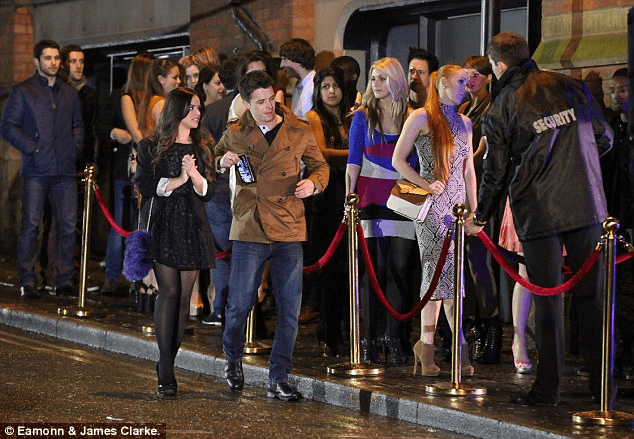